In [1]:
import pandas as pd 
df=pd.read_csv(r"/Users/priyankamalavade/Desktop/BRS/data/cleaned_dataset.csv")
df.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time (minutes),Genre,Rank
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313,10080.0,"Over the past three years, Jay Shetty has beco...",654.0,Personal Success,1
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658,615.0,Brought to you by Penguin.,203.0,Meditation,1
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174,10378.0,"In this generation-defining self-help guide, a...",317.0,Personal Success,3
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614,888.0,Brought to you by Penguin.,335.0,Psychology,1
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302,1005.0,"Stop going through life, Start growing throug...",385.0,Literary Essays,1


In [2]:
print(df.duplicated().sum())
print(df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3025 non-null   object 
 1   Author                    3025 non-null   object 
 2   Rating                    3025 non-null   float64
 3   Number of Reviews         3025 non-null   int64  
 4   Price                     3025 non-null   float64
 5   Description               3025 non-null   object 
 6   Listening Time (minutes)  3025 non-null   float64
 7   Genre                     3025 non-null   object 
 8   Rank                      3025 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 212.8+ KB
None


# Preprocessing Text Columns

* Convert to lowercase

* Remove punctuation and stopwords

* Apply lemmatization

* Combine Book Name and Description into a single text field




In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [6]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
lemmatizer

<WordNetLemmatizer>

In [8]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
    

In [9]:
df['combined_text'] = df['Book Name'] + ' ' + df['Description']
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)
df['cleaned_text'].head()

0    think like monk secret harness power positivit...
1    ikigai japanese secret long happy life brought...
2    subtle art giving fck counterintuitive approac...
3    atomic habit easy proven way build good habit ...
4    life amazing secret find balance purpose life ...
Name: cleaned_text, dtype: object

# Feature Extraction using TF-IDF

1) Transform text into numerical vectors

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text'])


In [12]:
tfidf

TfidfVectorizer(max_features=1000)

In [11]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 48081 stored elements and shape (3025, 1000)>

# Clustering Books with K-Means

1) Group books based on textual similarity

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
# Elbow method to choose optimal k
inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

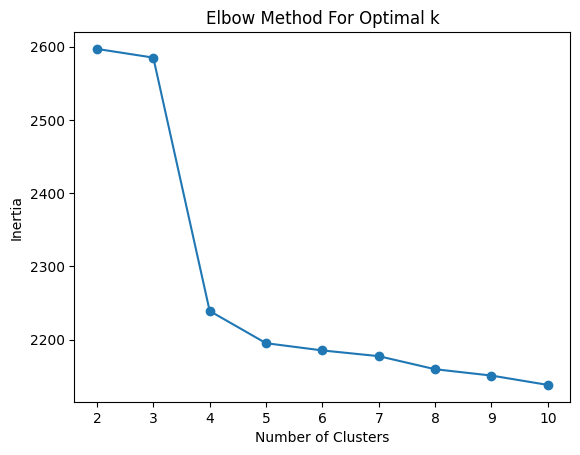

In [15]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [20]:
# Fit model with chosen k
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


In [21]:
df['cluster'].value_counts()

cluster
3    1760
1     666
2     394
0     205
Name: count, dtype: int64

# Visualizing the Clusters (PCA )

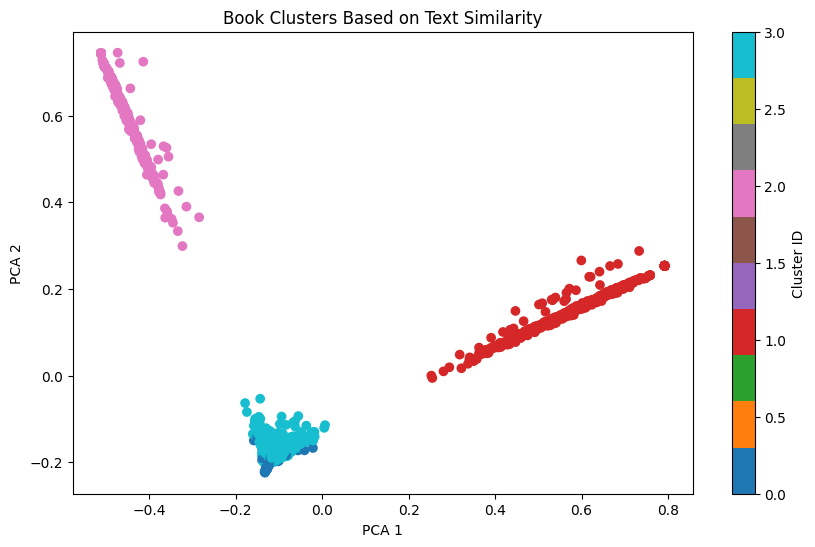

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df['cluster'], cmap='tab10')
plt.title('Book Clusters Based on Text Similarity')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()


In [24]:
df.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time (minutes),Genre,Rank,combined_text,cleaned_text,cluster
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313,10080.0,"Over the past three years, Jay Shetty has beco...",654.0,Personal Success,1,Think Like a Monk: The Secret of How to Harnes...,think like monk secret harness power positivit...,3
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658,615.0,Brought to you by Penguin.,203.0,Meditation,1,Ikigai: The Japanese Secret to a Long and Happ...,ikigai japanese secret long happy life brought...,0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174,10378.0,"In this generation-defining self-help guide, a...",317.0,Personal Success,3,The Subtle Art of Not Giving a F*ck: A Counter...,subtle art giving fck counterintuitive approac...,3
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614,888.0,Brought to you by Penguin.,335.0,Psychology,1,Atomic Habits: An Easy and Proven Way to Build...,atomic habit easy proven way build good habit ...,0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302,1005.0,"Stop going through life, Start growing throug...",385.0,Literary Essays,1,Life's Amazing Secrets: How to Find Balance an...,life amazing secret find balance purpose life ...,3


In [25]:
df.to_csv("/Users/priyankamalavade/Desktop/BRS/data/clustered_books.csv",index=False)